# Example Usage of `irrigation30`

In this notebook, you'll learn how to use the `irrigation30` package. We'll demo all of the functions in the package, including:

- Importing the package
- Authenticating with Google Earth Engine
- Instantiating the model
- Training the model and generating irrigation predictions
- Plotting the interactive map tool
- Plotting helper charts for: NDVI, temperature, precipitation
- Saving irrigation TIF assets to GEE and TIF files to Google Drive

## Import the package

First step is importing the `irrigation30` module. 

Note: you can also import the module functions directly with:

`from irrigation30 import authenticate, Irrigation30`. 

In [1]:
import irrigation30 as irr

## Authenticate with Google Earth Engine

Run this code to authenticate your GEE account. This will trigger your browser to open another page that asks you to sign-in to GEE and will provide a code to authorize your account. Copy the code and enter it into the input form below.

In [2]:
irr.authenticate()

Enter verification code: 4/2gEgxmeOKGJFDhmT_kuLvXe9Cj2cUjtpUis5FV-GVbIGD-4LecItdeA

Successfully saved authorization token.


## Instantiating the `Irrigation30` Model

Next, we instantiate the model object `Irrigation30`. For this, you'll have to specify the region of interest with the arguments:

`center_lat`, `center_lon`, and `edge_len`. 

You can also use optional arguments `num_clusters`, `year`, and `base_asset_directory` if you plan to save the irrigation map to a TIF asset on GEE or a TIF file on Google Drive. 

In [5]:
# Latitude and Longitude of center point
# For this demo, we are using a coordinate in Idaho
lat = 43.771114
lon = -116.736866

# Edge length of region of interest box, in degrees
edge_len = 0.5

# Optional arguments --> Using default values
num_clusters = 2
year = 2018
base_asset_directory = "users/whawkins/"

# Instantiate the model
model = irr.Irrigation30(
    center_lat=lat, 
    center_lon=lon, 
    edge_len=edge_len, 
    num_clusters=num_clusters, 
    year=year, 
    base_asset_directory=base_asset_directory
)

The selected area is approximately 40.16 km by 55.61 km


## Fit the Model and Generate Irrigation Predictions

Next, we call the `fit_predict` function on our model to train our model and generate irrigation predictions for all 30m pixels in the region of interest. Note: this may take a few minutes.

In [6]:
%%time
model.fit_predict()

Model building...
Model complete!
CPU times: user 65.5 ms, sys: 5.69 ms, total: 71.2 ms
Wall time: 4min 6s


## Plot the Interactive Map

Next, we can plot the interactive map to visualize the irrigation predictions and compare against relevant satellite data. In this map, there are a number of layers that you can toggle on and off:

- **Prediction**: The labels for each cluster trained in the unsupervised model. The irrigation labels for each cluster, the associated colors of each cluster in the map, is printed in the "Prediction Layer Legend" above the map. 
- **Sentinel2-Q**: The Sentinel-2 satellite images for each quarter of the year. 
- **GFSAD1000**: The irrigation labels at 1000m resolution from GFSAD1000.
- **NDVI**: The NDVI layers for each month of the year. 

Note: this may take a few minutes.

In [ ]:
%%time
model.plot_map()

ADDED PREDICTION LAYER 	--> 1.96 min
ADDED S2 RGB LAYERS 	--> 0.06 min
ADDED G1000 LAYER --> 1.77 min
Could not display NDVI Jan


## Plot Charts for NDVI, Temperature and Precipitation

You can also plot line charts to visualize the monthly signatures of NDVI, Temperature, and Precipitation in your region of interest. 

#### Avg. NDVI Chart

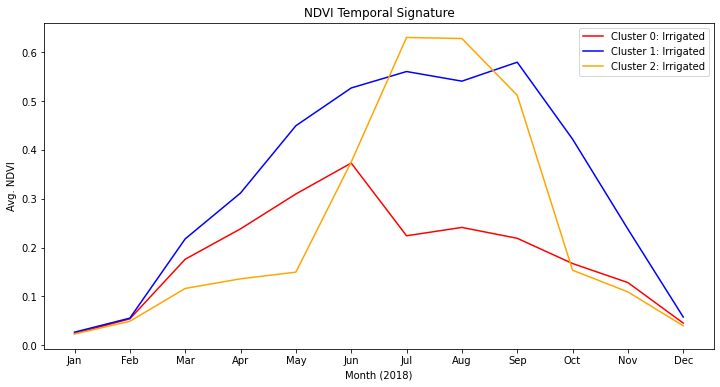

In [9]:
model.plot_avg_ndvi()

#### Precipitation Chart

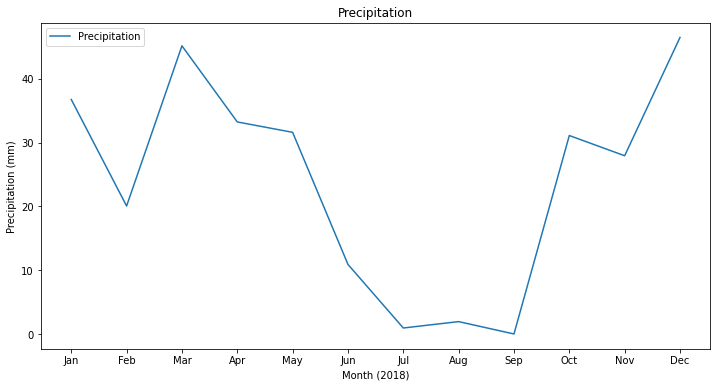

In [8]:
model.plot_precipitation()

#### Temperature Chart

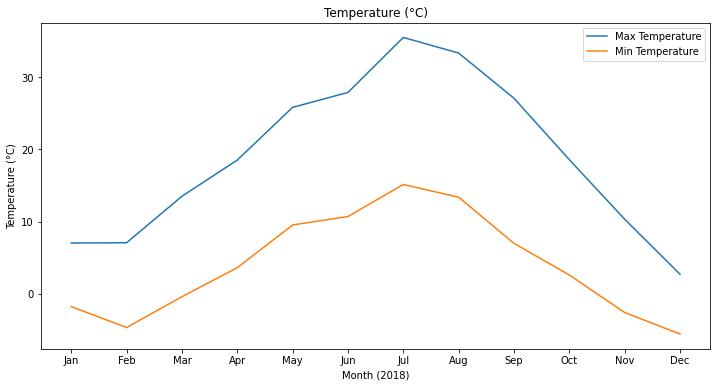

In [9]:
model.plot_temperature_max_min()

#### Get annual irrigation labels for each cluster

Note that a cluster is labelled as irrigated if it has at least one month that passes our NDVI/Precipitation criteria.

In [10]:
model.simple_label

['Irrigated', 'Irrigated']

## Save Irrigation Map Output to GEE TIF Asset

With the `write_image_asset` function, you can save the irrigation prediction map output to a TIF asset on Google Earth Engine. Make sure to set a `base_asset_directory` like `'users/<GEE_USERNAME>/'` to represent your GEE Asset folder when instantiating the Irrigation30 model object. 

In [14]:
# Name of the image asset to be saved to GEE Assets
image_asset_id = "test_asset"

model.write_image_asset(image_asset_id)

BASE ASSET DIRECTORY: users/whawkins/
IMAGE ASSET PATH: users/whawkins/test_asset_simple


You can also save just the cluster labels to the TIF asset by setting `write_simple_version=True`.

In [ ]:
# Name of the TIF asset to be saved to GEE Assets
image_asset_id = "test_asset_simple"

# Save just the cluster labels with write_simple_version=True
model.write_image_asset(image_asset_id, write_simple_version=True)

## Save Irrigation Map Output to TIF on Google Drive

With the `write_image_google_drive` function, you can save the irrigation prediction map output to a TIF file on your Google Drive. Make sure to set `base_asset_directory` to `'users/<GEE_USERNAME>/'` when instantiating the Irrigation30 model object. 

In [15]:
# Name of the TIF file to be saved to Google Drive
filename = "test_TIF"

model.write_image_google_drive(filename)

Writing To Google Drive filename =  test_TIF


You can also save just the cluster labels to the TIF file by setting `write_simple_version=True`.

In [16]:
# Name of the TIF file to be saved to Google Drive
filename = "test_TIF_simple"

# Save just the cluster labels with write_simple_version=True
model.write_image_google_drive(filename, write_simple_version=True)

Writing To Google Drive filename =  test_TIF_simple
